In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
df = pd.read_csv('student-por_2.csv', sep=';')

In [3]:
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freet

(array([  1.,   0.,   7.,  42., 107., 186., 154., 106.,  38.,   8.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

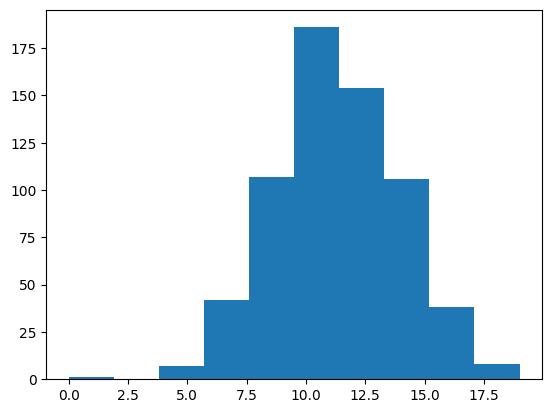

In [4]:
plt.hist(df['G1'])

## It looks like a Normal Distribution.

In [5]:
def return_params(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return [mean, std_dev]

In [6]:
params = return_params(df['G1'])

In [7]:
print(params)

[11.399075500770415, 2.7431493168577212]


In [16]:
# Calculate the negative log-likelihood of a dataset under a normal distribution. Minimizing this function provides us with the maximum likelihood estimation.

def likelihood_fn(params,data):
    '''
    param = parameters of distribution - [mean,standard deviation]
    data = data from distribution
    '''
    mean = params[0]
    std_dev = params[1] 
    exponent = -((data - mean) ** 2) / (2 * std_dev ** 2)
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(exponent)
    pdf[pdf==0]=np.finfo(float).eps
    log_like = np.log(pdf)
    return -np.sum(log_like)

In [17]:
print("The parameters [Mean, Standard Deviation] obtained by maximising log likelihood for initial guess (i, 2 + (i/10)) are")
for i in range(0, 20):
    j = 1 + (i/10)
    sol = minimize(likelihood_fn, [i, j], args = df['G1'], method = 'Powell')
    print("Parameters obtained:", sol.x, "\t Initial Guess:", (i,j))

The parameters [Mean, Standard Deviation] obtained by maximising log likelihood for initial guess (i, 2 + (i/10)) are
Parameters obtained: [11.39898048  2.74345888] 	 Initial Guess: (0, 1.0)
Parameters obtained: [11.39918821  2.7427911 ] 	 Initial Guess: (1, 1.1)
Parameters obtained: [11.39908643  2.74311601] 	 Initial Guess: (2, 1.2)
Parameters obtained: [11.39907437  2.7431526 ] 	 Initial Guess: (3, 1.3)
Parameters obtained: [11.3989558   2.74347782] 	 Initial Guess: (4, 1.4)
Parameters obtained: [11.39895203  2.74346604] 	 Initial Guess: (5, 1.5)
Parameters obtained: [11.39896881  2.74340064] 	 Initial Guess: (6, 1.6)
Parameters obtained: [11.39887196  2.74357691] 	 Initial Guess: (7, 1.7)
Parameters obtained: [11.399179    2.74296256] 	 Initial Guess: (8, 1.8)
Parameters obtained: [11.39933335  2.74278153] 	 Initial Guess: (9, 1.9)
Parameters obtained: [11.3990755   2.74314878] 	 Initial Guess: (10, 2.0)
Parameters obtained: [11.39909813  2.74314229] 	 Initial Guess: (11, 2.1)
Para